In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

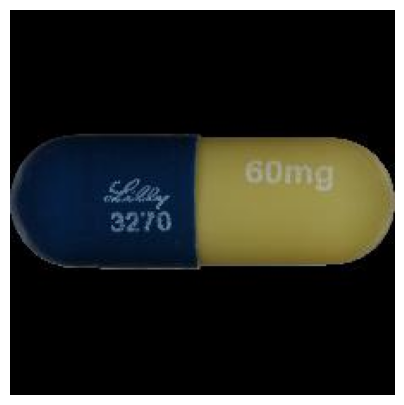

In [40]:
img = cv2.imread("../practice_set_seg/0002-3270_0_0.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis(False)
plt.show()

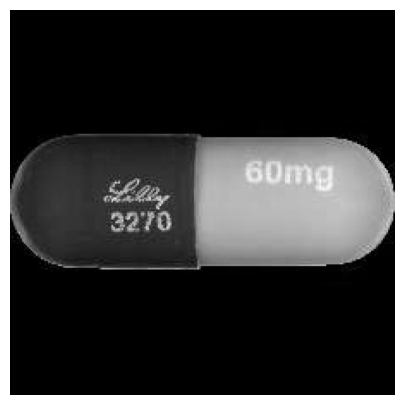

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5,5))
plt.imshow(gray, cmap="gray")
plt.axis(False)
plt.show()

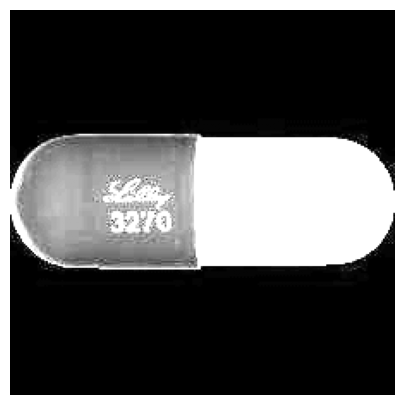

In [42]:
if gray.mean() < 50 :
  _, mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_BINARY_INV)
else:
  _, mask = cv2.threshold(gray,30, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(mask, cmap="gray")
plt.axis(False)
plt.show()

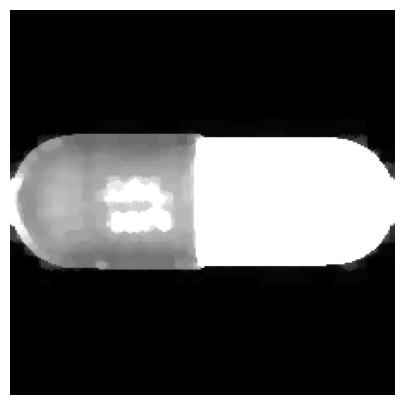

In [43]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(5,5))
plt.imshow(mask, cmap="gray")
plt.axis(False)
plt.show()


In [44]:
contours,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnt = max(contours, key=cv2.contourArea)

# print(cnt)


In [45]:
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt, True)
x,y,w,h = cv2.boundingRect(cnt)

features = {
    "area" : area,
    "perimeter" : perimeter,
    "bbox_width" :w,
    "bbox_height" : h,
    "aspect_ratio" : w/h if h>0 else 99,
    "circularity": 4*np.pi*area/(perimeter*perimeter) if perimeter>0 else 0,
    "extent" : area/(w*h) if h>0 else 0
}

print(features)

{'area': 18793.5, 'perimeter': 734.6833271980286, 'bbox_width': 224, 'bbox_height': 98, 'aspect_ratio': 2.2857142857142856, 'circularity': 0.43753939710167905, 'extent': 0.8561178935860059}


In [46]:
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = area/hull_area if hull_area>0 else 0

features["solidity"] = solidity

# HOG features
hog = cv2.HOGDescriptor()
# Resize gray image to a standard size for HOG
resized_gray = cv2.resize(gray, (64, 128)) # width, height
hog_features = hog.compute(resized_gray)
features["hog"] = hog_features.flatten()

In [47]:
M = cv2.moments(cnt)
hu = cv2.HuMoments(M).flatten()
for i in range(7):
  if abs(hu[i]) < 1e-10:
    hu[i] = 1e-10
  features[f"hu_{i}"] = hu[i]
  features[f"hu_log_{i}"] = -np.sign(hu[i]) * np.log10(abs(hu[i]))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
pixels = hsv[max==255]
if len(pixels) > 10 :
  mean = pixels.mean(axis=0)
  std = pixels.std(axis=0)
  features["hue_mean"] = mean[0]
  features["saturation_mean"] = mean[1]
  features["value_mean"] = mean[2]
  features["hue_std"] = std[0]
  features["sat_std"] = std[1]
  features["value_std"] = std[2]


In [48]:
print(features)

{'area': 18793.5, 'perimeter': 734.6833271980286, 'bbox_width': 224, 'bbox_height': 98, 'aspect_ratio': 2.2857142857142856, 'circularity': 0.43753939710167905, 'extent': 0.8561178935860059, 'solidity': 0.9326567578968263, 'hog': array([0., 0., 0., ..., 0., 0., 0.], shape=(3780,), dtype=float32), 'hu_0': np.float64(0.2370219694275552), 'hu_log_0': np.float64(0.6252113976229764), 'hu_1': np.float64(0.029269928228202277), 'hu_log_1': np.float64(1.5335783424836635), 'hu_2': np.float64(0.00010517364115951272), 'hu_log_2': np.float64(3.9780930903472167), 'hu_3': np.float64(2.3228463508599105e-05), 'hu_log_3': np.float64(4.633979516493609), 'hu_4': np.float64(1.111806855970122e-09), 'hu_log_4': np.float64(8.953970652207145), 'hu_5': np.float64(3.743745699733511e-06), 'hu_log_5': np.float64(5.426693659120191), 'hu_6': np.float64(2.864371093134256e-10), 'hu_log_6': np.float64(9.542970717767723)}
